In [2]:
%matplotlib inline
%config InlineBackend.figure_format= 'retina'

import numpy as np
from PIL import Image
import torchvision
import sys
import torch
import helper  
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as f
from torch.utils.data import Dataset, TensorDataset, DataLoader, ConcatDataset
from cdataset import musicianDataset
 


In [3]:
device= torch.device('cuda' if torch.cuda.is_available()else 'cpu')
normalize = transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],)


batch_size=64
img_size =(224,224) 

dataset= musicianDataset(csv_file= 'Book1.csv', root_dir= 'images',transform= transforms.Compose([ transforms.ToPILImage(), transforms.Resize(img_size,Image.NEAREST),transforms.ToTensor(),normalize,]))
train_set, test_set= torch.utils.data.random_split(dataset, [69,10])
train_loader= DataLoader(dataset=train_set, batch_size=batch_size, shuffle = True)
test_loader= DataLoader(dataset=test_set, batch_size=batch_size, shuffle = True)

 

In [4]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 224, 224])
torch.Size([64])


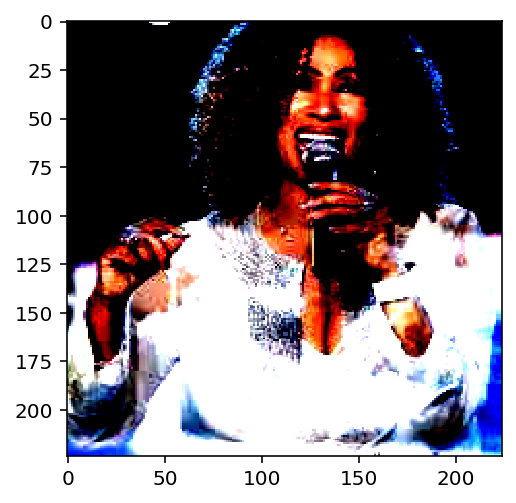

In [5]:

plt.imshow(torchvision.utils.make_grid(images[43], nrow=5).permute(1, 2, 0))